<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Projeto_3_EBAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [5]:
df = pd.read_csv("/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [6]:
#Seu código aqui para a média

# Limpando nomes de colunas
df.columns = df.columns.str.strip()

# Convertendo 'Preco_Normal' para número
df['Preco_Normal'] = pd.to_numeric(df['Preco_Normal'], errors='coerce')

media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index()

# Exibir resultado
print(media_por_categoria)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal   1783.556485
1          comidas-preparadas   3095.043478
2                  congelados   2108.042553
3                      frutas   1724.473684
4        instantaneos-y-sopas    765.491228
5                     lacteos   2385.219239
6                    verduras   1343.296875


In [8]:
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index()

# Exibir resultado
print(mediana_por_categoria)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal        1569.0
1          comidas-preparadas        3290.0
2                  congelados        1519.0
3                      frutas        1195.0
4        instantaneos-y-sopas         439.0
5                     lacteos         989.0
6                    verduras        1180.0


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [10]:
#Seu código aqui
# Agrupando por categoria e calculando média, mediana e desvio padrão
estatisticas = df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median', 'std']).reset_index()

# Renomeando colunas para facilitar leitura
estatisticas.columns = ['Categoria', 'Media_P_Normal', 'Mediana_P_Normal', 'Desvio_Padrao']

# Ordenando da maior para a menor variação (desvio padrão)
estatisticas_ordenado = estatisticas.sort_values(by='Desvio_Padrao', ascending=False)

# Exibindo resultado
print(estatisticas_ordenado)

                    Categoria  Media_P_Normal  Mediana_P_Normal  Desvio_Padrao
5                     lacteos     2385.219239             989.0    3925.816164
0  belleza-y-cuidado-personal     1783.556485            1569.0    2210.041719
2                  congelados     2108.042553            1519.0    2111.539896
1          comidas-preparadas     3095.043478            3290.0    2019.911428
3                      frutas     1724.473684            1195.0    1639.151114
4        instantaneos-y-sopas      765.491228             439.0    1170.232869
6                    verduras     1343.296875            1180.0    1012.699625


Digite nesse campo o comportamento que você identificou.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

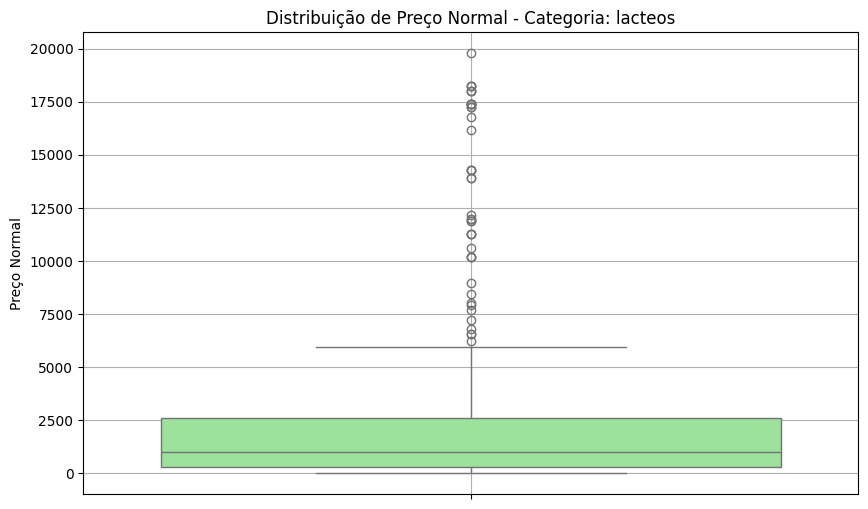

In [14]:
#Seu código aqui
# Filtrando apenas a categoria 'Lácteos'
df_lacteos = df[df['Categoria'] == 'lacteos']

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Preco_Normal', data=df_lacteos, color='lightgreen')
plt.title('Distribuição de Preço Normal - Categoria: lacteos')
plt.ylabel('Preço Normal')
plt.grid(True)
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

/tmp/ipython-input-2237016456.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_descontos, x='Categoria', y='Desconto', palette='viridis')


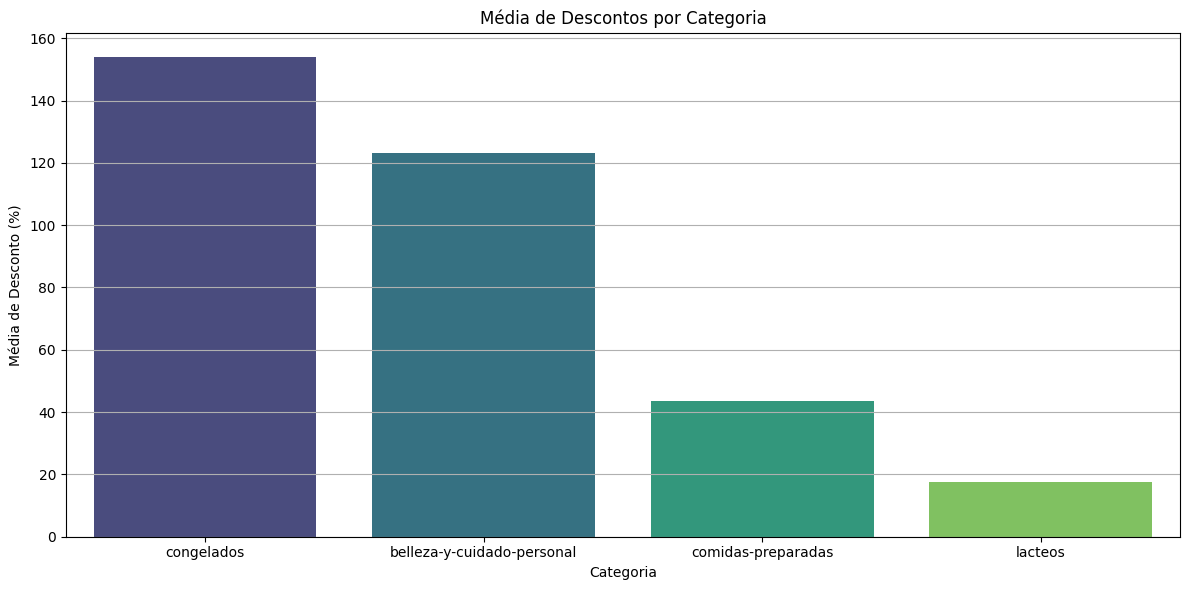

In [24]:
# Seu código aqui

# Calculando média por categoria
media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index()

# Removendo categorias com média 0 ou NaN
media_descontos = media_descontos[media_descontos['Desconto'] > 0]

# Ordenando
media_descontos = media_descontos.sort_values(by='Desconto', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=media_descontos, x='Categoria', y='Desconto', palette='viridis')
plt.title('Média de Descontos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto (%)')
plt.xticks()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [31]:
# Agrupando por Categoria e Marca, calculando a média de desconto
agrupado = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Removendo possíveis NaNs
agrupado = agrupado.dropna(subset=['Desconto'])

#Filtrando apenas onde há desconto médio > 0
agrupado = agrupado[agrupado['Desconto'] > 0]

# Criar o gráfico interativo com Plotly
fig = px.treemap(
    agrupado[agrupado['Desconto'] > 0],
    path=['Categoria', 'Marca'],
    values='Desconto',
    color='Desconto',
    color_continuous_scale='Viridis',
    title='Treemap Interativo - Média de Desconto por Categoria e Marca'
)
fig.show()